# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [1]:
# -- import libraries here
import pandas as pd
import numpy as np
# for plotting
import seaborn as sns
# np.polyfit
#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import scipy as sp

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [2]:
# -- your code here
estate = pd.read_csv('https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/Real_estate.csv')
estate

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [3]:
# -- your code here
estate['log_distance'] = np.log10(estate['distance_nearest_MRT_station'])

Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [4]:
# -- your code here
scaler = StandardScaler()
estate['log_distance'] = scaler.fit_transform(np.array(estate['log_distance']).reshape(-1,1))
estate['house_price_unit_area'] = scaler.fit_transform(np.array(estate['house_price_unit_area']).reshape(-1,1))

Using the code library of your choice, fit a linear regression model to the data

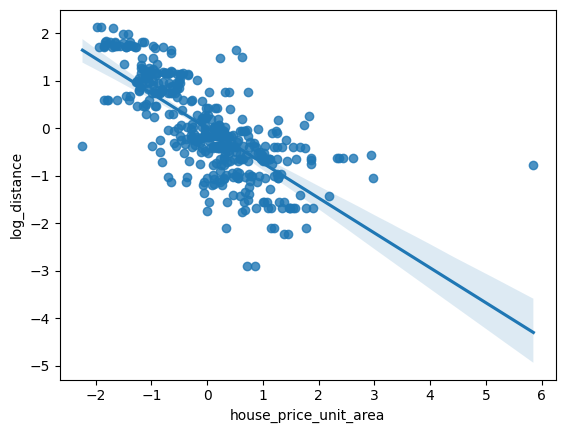

In [5]:
# -- your code here
ax = sns.regplot(x=estate['house_price_unit_area'], y=estate['log_distance'])

Print both the $R^2$ and Adjusted-$R^2$ of this model

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [6]:
# -- your code here
slope, intercept, r, p, sterr = sp.stats.linregress(x=estate['house_price_unit_area'], y=estate['log_distance'])
mod = smf.ols(formula="house_price_unit_area ~ log_distance", data = estate)
res = mod.fit()
res.summary()
print("r^2: %1.3f" % (res.rsquared))
print("adjusted r^2: %1.3f" % (res.rsquared_adj))

r^2: 0.539
adjusted r^2: 0.538


Print the coefficient (slope) of the line

In [7]:
# -- your code here
print("coefficient = %1.3f" % slope)

coefficient = -0.734


From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

As the distance from the MRT station increases the price of the house decreases.

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

Text(0.5, 1.0, 'Prediction and actual results per House Price')

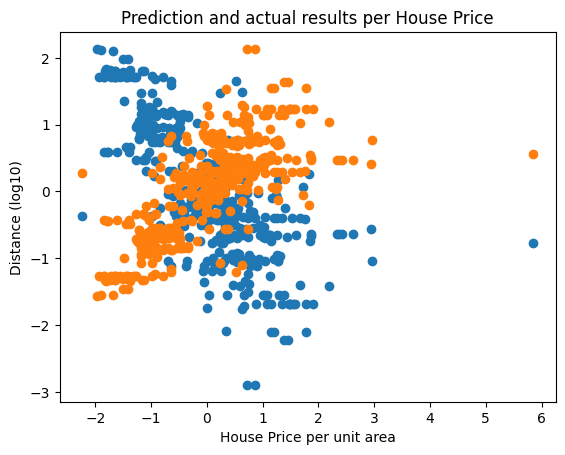

In [8]:
# -- your code here
plt.scatter(estate['house_price_unit_area'], estate['log_distance'], label="actual")
plt.scatter(estate['house_price_unit_area'], res.predict(estate), label="predicted")
plt.xlabel("House Price per unit area")
plt.ylabel("Distance (log10)")
plt.title("Prediction and actual results per House Price")

TARA - Missing captions

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

a univariate linear regression model looks like $y = a_0 + a_1 x$

a multivariate linear regression model with 3 exogenous variable looks like $y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$

The easiest way to implement it is to use `statsmodels.formula.api` which allows to write out the formula you want to use for the regression in more or less plain English. We did it in the linear regression notebook https://github.com/fedhere/FDSFE_FBianco/blob/main/HW5/linear_regression_in_detail.ipynb

The univariate linear model we built in that notebook was

```
import statsmodels.formula.api as smf
     
mod = smf.ols(formula='wspeed ~ population', data=df)
res = mod.fit()
res.summary()
```

y = ax + b => `formula='wspeed ~ population'`

The intercept (b) is implied in the use of `~`
`x` in this case was population and `y` wspeed

Your formula will look like
`formula='y ~ x1 + x2 + x3 + x4'` with the approproate feature names

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [9]:
# -- your code here
estate['house_age'] = scaler.fit_transform(np.array(estate['house_age']).reshape(-1,1))
estate['transaction_date'] = scaler.fit_transform(np.array(estate['transaction_date']).reshape(-1,1))
estate['convenience_stores'] = scaler.fit_transform(np.array(estate['convenience_stores']).reshape(-1,1))

Using the code library of your choice, fit a multiple linear regression model to the data

In [10]:
# -- your code here
mod = smf.ols(formula="house_price_unit_area ~ log_distance + convenience_stores + transaction_date + house_age", data = estate)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     house_price_unit_area   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.597
Method:                    Least Squares   F-statistic:                     154.2
Date:                   Mon, 23 Oct 2023   Prob (F-statistic):           2.72e-80
Time:                           04:55:51   Log-Likelihood:                -397.12
No. Observations:                    414   AIC:                             804.2
Df Residuals:                        409   BIC:                             824.4
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.645e-14      0.031  -1.81e-12      1.000      -0.061       0.061
log_distance          -0.6431      0.044    -14.697      0.000      -0.729      -0.557
convenience_stores     0.1375      0.044      3.160      0.002       0.052       0.223
transaction_date       0.1521      0.032      4.822      0.000       0.090       0.214
house_age             -0.1768      0.032     -5.599      0.000      -0.239      -0.115
==============================================================================
Omnibus:                      222.884   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3251.894
Skew:                           1.942   Prob(JB):                         0.00
Kurtosis:                      16.169   Cond. No.                         2.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print the coefficients of each of the features

In [11]:
# -- your code here
print("coefficient for log_distance = %1.3f" % (-0.6431))
print("coefficient for convenience_stores = %1.3f" % (.1375))
print("coefficient for transaction_date = %1.3f" % (.1521))
print("coefficient for house_age = %1.3f" % (-.1768))

coefficient for log_distance = -0.643
coefficient for convenience_stores = 0.138
coefficient for transaction_date = 0.152
coefficient for house_age = -0.177


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

*your answer here*

Print the $R^2$ of this model

In [12]:
# -- your code here
print("r^2 = %1.3f" % (res.rsquared))

r^2 = 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

The model has improved relative to task 1 when looking at the r^2 value as the value shows that there is a stronger correlation.

TARA - The increase in the r-squared may not mean that the model has improved since there are added parameters

Print the Adjusted-$R^2$ of this model

In [13]:
# -- your code here
print("adjusted r^2 = %1.3f" % (res.rsquared_adj))

adjusted r^2 = 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

for the same reason as the r^2 value, when accounting for the adjusted r^2, the model has improved due to a larger r^2 value and thus a stronger correlation

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2?

Text(0.5, 1.0, 'Prediction and actual results per House Price')

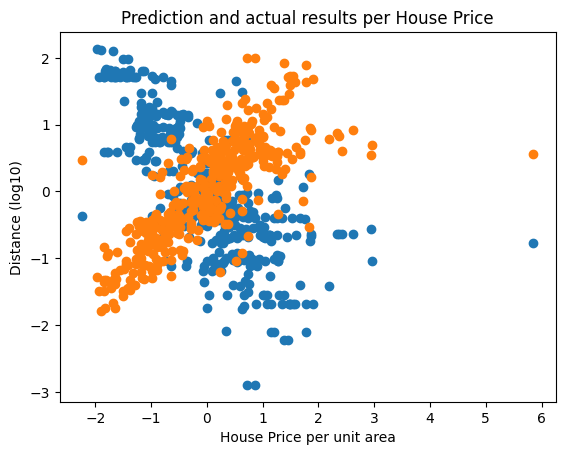

In [14]:
# -- your code here
plt.scatter(estate['house_price_unit_area'], estate['log_distance'], label="actual")
plt.scatter(estate['house_price_unit_area'], res.predict(estate), label="predicted")
plt.xlabel("House Price per unit area")
plt.ylabel("Distance (log10)")
plt.title("Prediction and actual results per House Price")

TARA - Good work, make sure to include captions with the figures